In [26]:
#탐색적 분석 (EDA)
#주택 가격 데이터 탐색


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [28]:
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [29]:
data=pd.read_csv("https://github.com/data-labs/data/raw/main/house_train.csv")

In [30]:
df=data.copy()

In [31]:
print(data.shape)
df[:3]

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

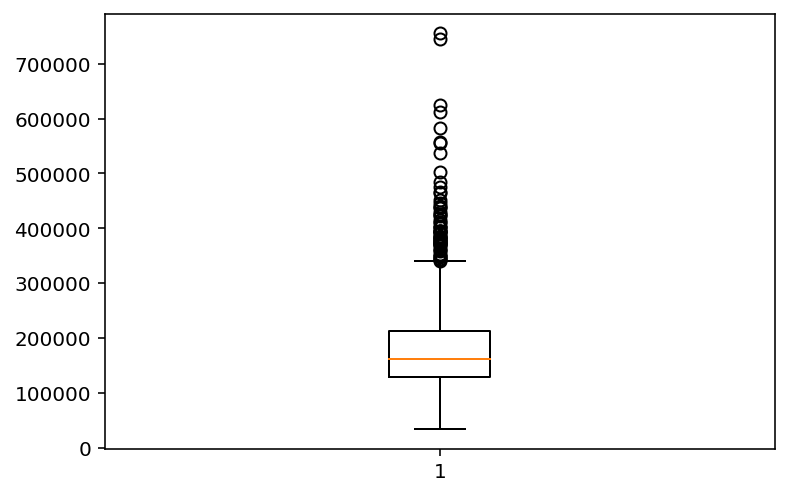

In [33]:
#박스 플롯
plt.boxplot(df['SalePrice']);plt.show()

In [34]:
#기초 통계값
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

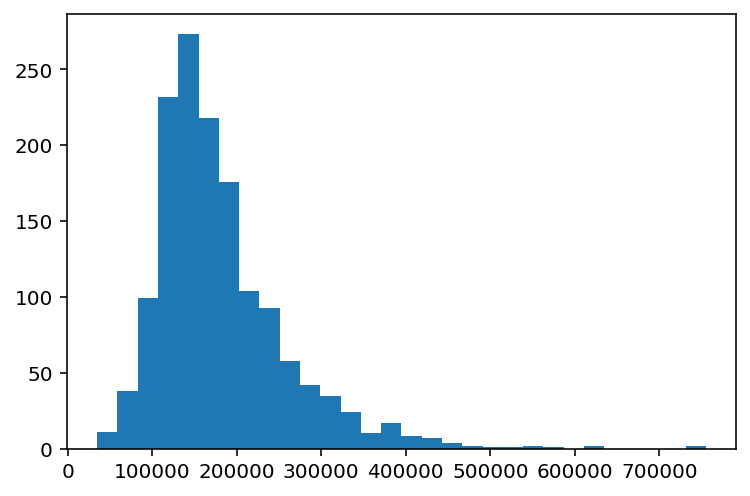

In [35]:
plt.hist(df["SalePrice"],bins=30);plt.show()
#df['SalePrice'].hist(bins=30 #다른방법)

C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

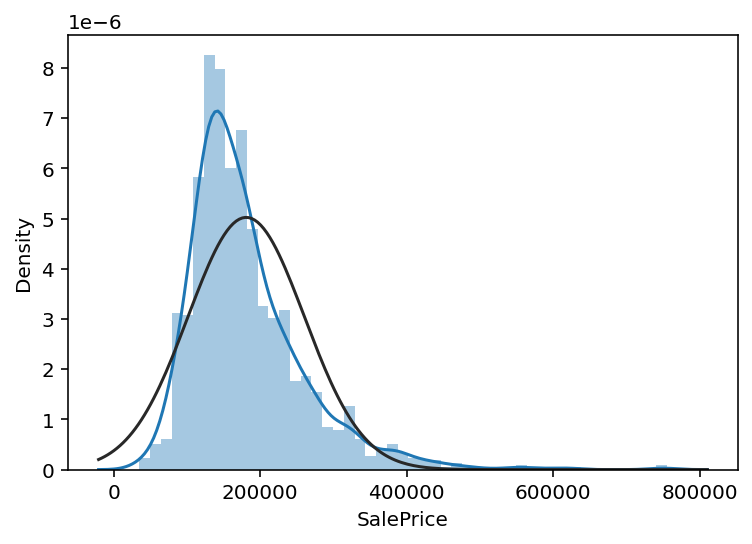

In [36]:
#확률분포 보기, 가장 가까운 정규 분포와 비교
sns.distplot(df['SalePrice'],fit=norm)

In [37]:
#Skewness=왜도,Kurtosis=첨도

print("Skewness:",df['SalePrice'].skew())
print("Kurtosis:",df['SalePrice'].kurtosis())

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.0008328074983949784
Kurtosis: -0.02557190540656551


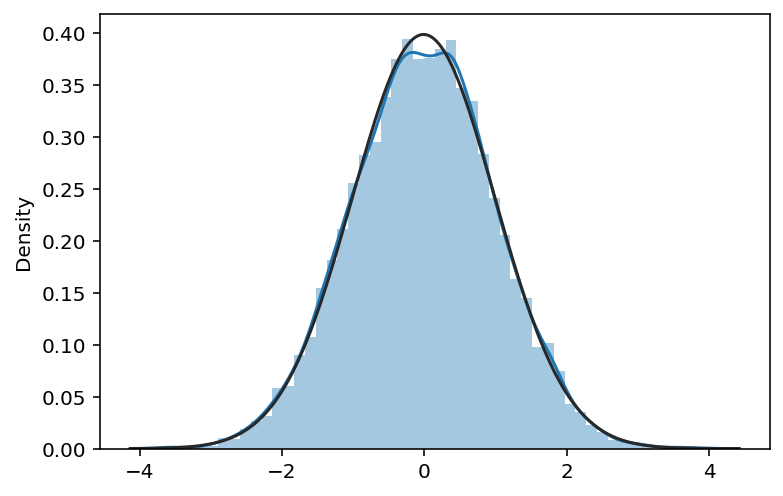

In [38]:
#실제 정규분포의 경우 왜도와 첨도 보기
N=10000
x=np.random.randn(N)
sns.distplot(x,fit=norm)
print("Skewness:",stats.skew(x))
print("Kurtosis:",stats.kurtosis(x))

C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


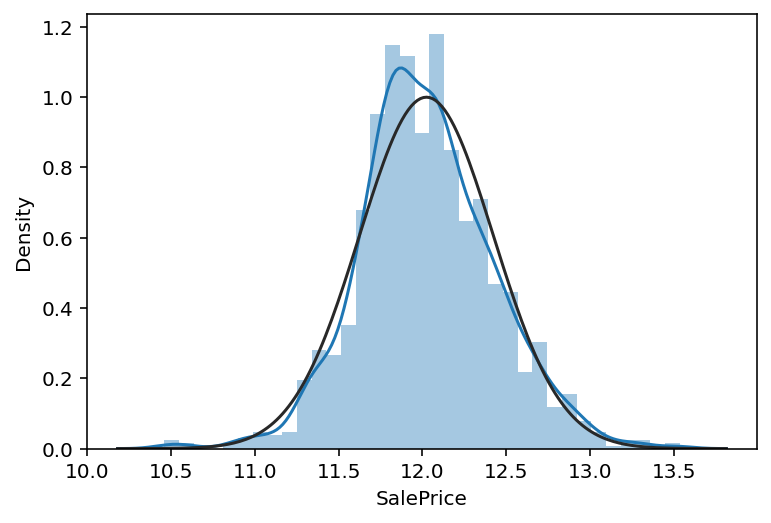

In [39]:
#목적 변수가 돈과 관련된 값이므로 로그를 취해본다
sns.distplot(np.log(df['SalePrice']),fit=norm);

In [40]:
#로그를 취한 경우 왜도와 첨도 확인
print("Skewness:",np.log(df['SalePrice']).skew())
print("kurtosis:",np.log(df['SalePrice']).kurtosis())

Skewness: 0.12133506220520406
kurtosis: 0.8095319958036296


In [41]:
#입력변수(특성, 설명 변수, 독립 변수)와 목적변수(레이블, 출력 변수, 종속 변수)의 상관관계

<AxesSubplot:>

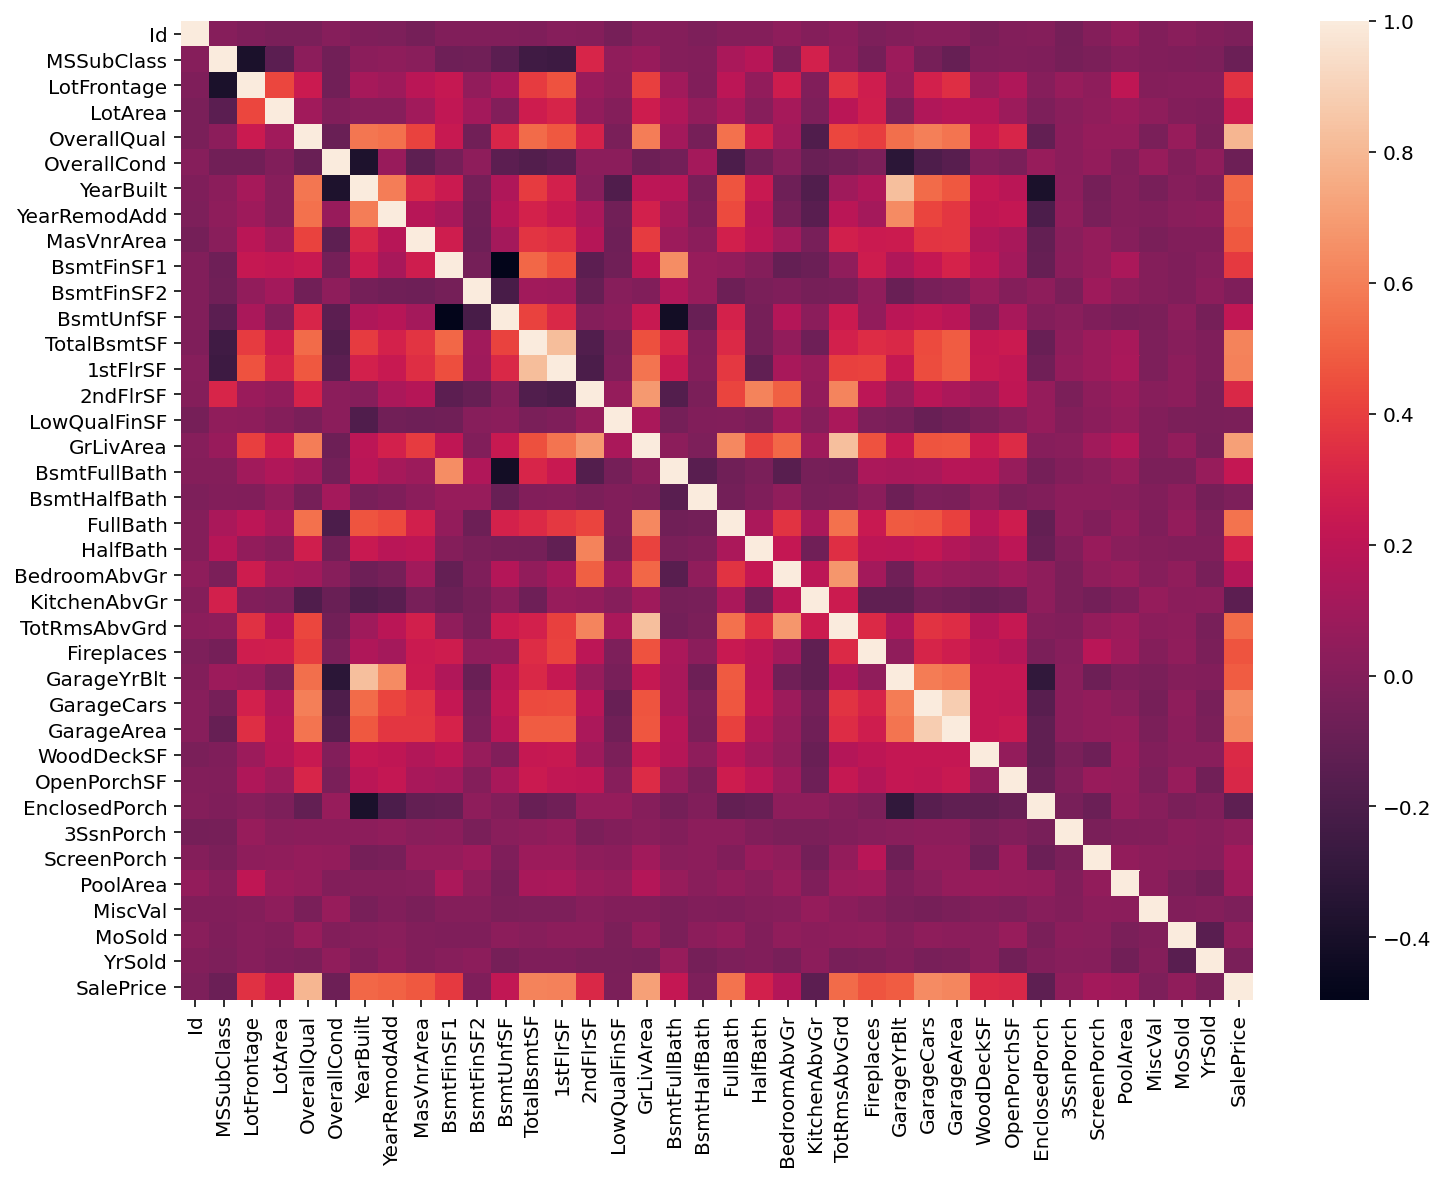

In [42]:
corrmat=df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corrmat)

In [43]:
#목적 변수와 상관계수가 큰 특성으로 가진다
corrmat[-5:]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
PoolArea,0.057044,0.008283,0.206167,0.077672,0.065166,-0.001985,0.004950,0.005829,0.011723,0.140491,...,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.029669,-0.033737,-0.059689,0.092404
MiscVal,-0.006242,-0.007683,0.003368,0.038068,-0.031406,0.068777,-0.034383,-0.010286,-0.029815,0.003571,...,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
MoSold,0.021172,-0.013585,0.011200,0.001205,0.070815,-0.003511,0.012398,0.021490,-0.005965,-0.015727,...,0.021011,0.071255,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.046432
YrSold,0.000712,-0.021407,0.007450,-0.014261,-0.027347,0.043950,-0.013618,0.035743,-0.008201,0.014359,...,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


In [44]:
df_sort=corrmat['SalePrice'].to_frame().sort_values(by='SalePrice',ascending=False)
df_sort[:10]

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [45]:
df_sort[-10:]

,SalePrice
BsmtFinSF2,-0.011378
BsmtHalfBath,-0.016844
MiscVal,-0.021190
Id,-0.021917
LowQualFinSF,-0.025606
YrSold,-0.028923
OverallCond,-0.077856
MSSubClass,-0.084284
EnclosedPorch,-0.128578
KitchenAbvGr,-0.135907


In [46]:
#상관계수가 큰 상위 10개의 특성을 선택하여 주로 보겠다
#주의: 상관계수가 "음수"로 큰 것도 확인해봐야 한다(반대 영향을 주는 특성임)
cols=df_sort.index[:10]
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

<AxesSubplot:>

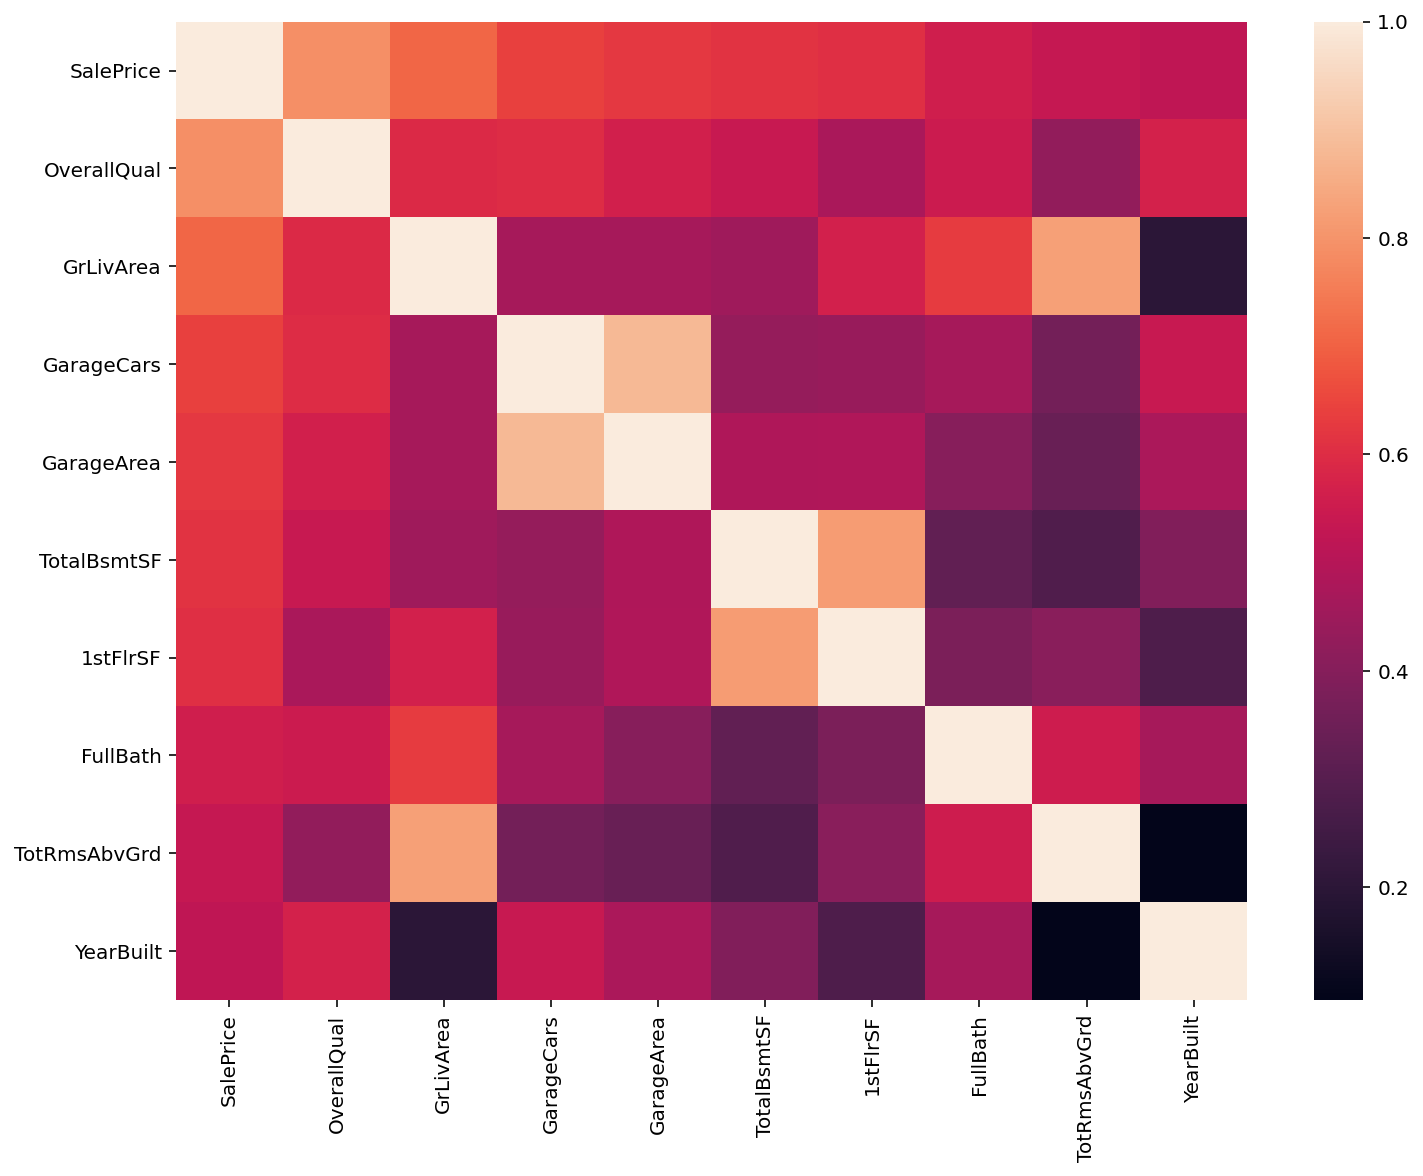

In [47]:
corrmat_10=df[cols].corr()
plt.figure(figsize=(12,9))
sns.heatmap(corrmat_10)

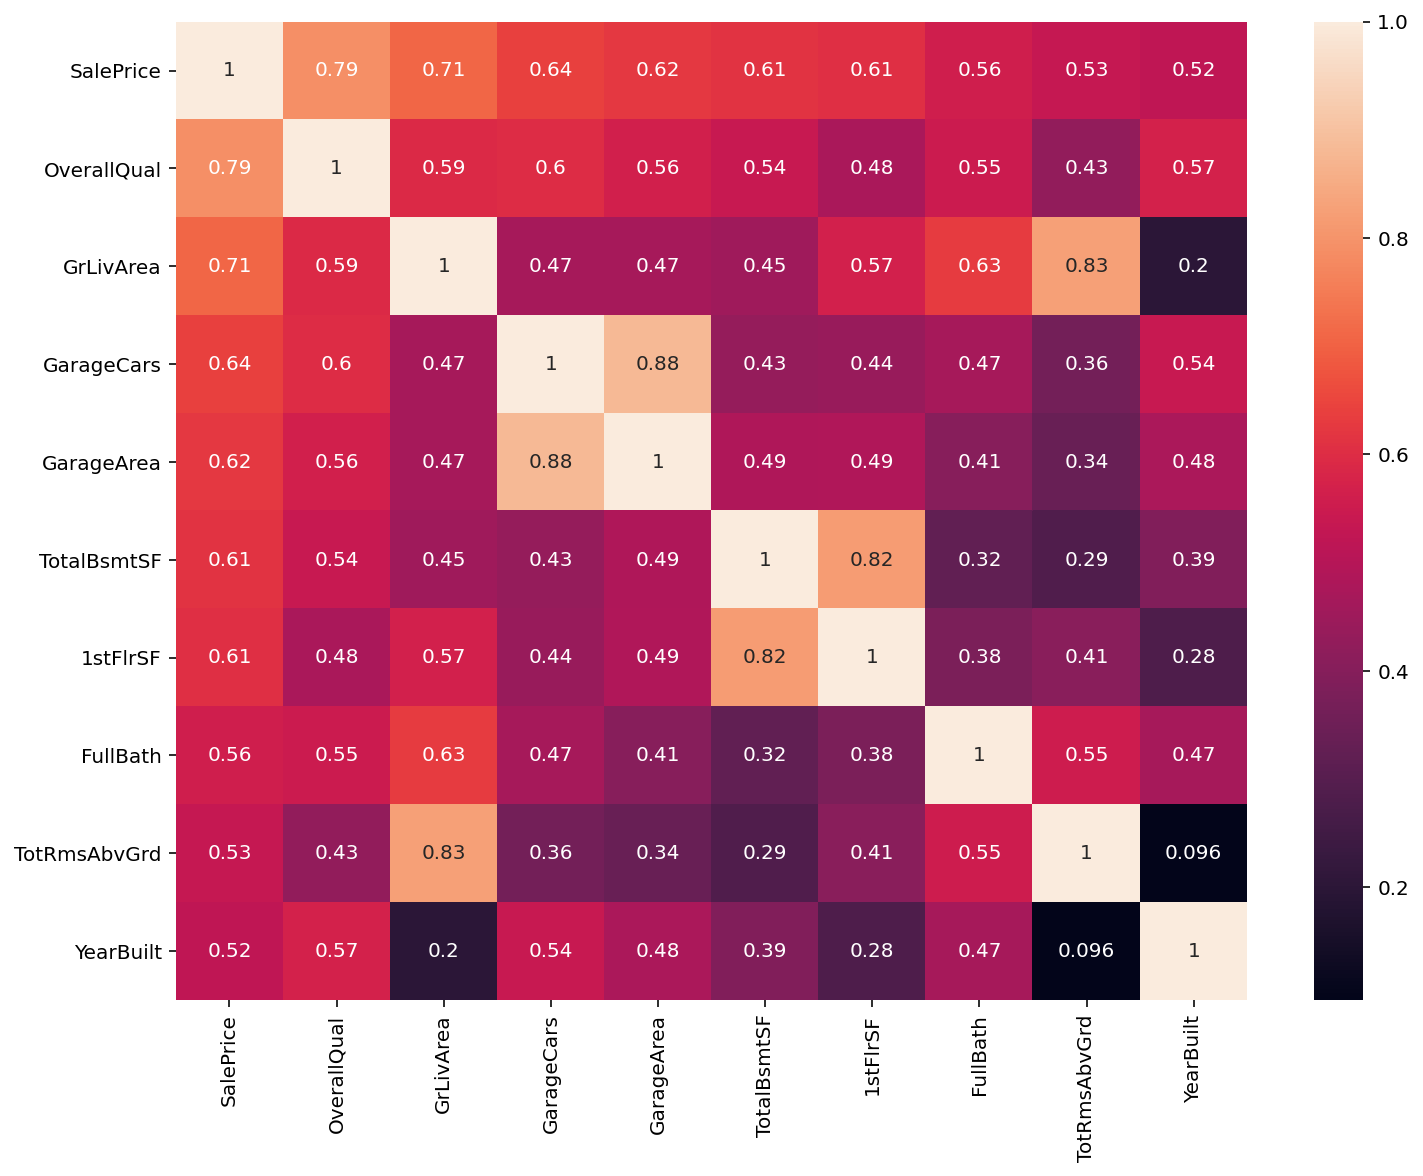

In [48]:
#히트맵에 숫자 값을 표시하기
plt.figure(figsize=(12,9))
corrmat_10=np.corrcoef(df[cols].values.T)
sns.heatmap(corrmat_10,annot=True,
           yticklabels=cols.values, xticklabels=cols.values)
plt.show()

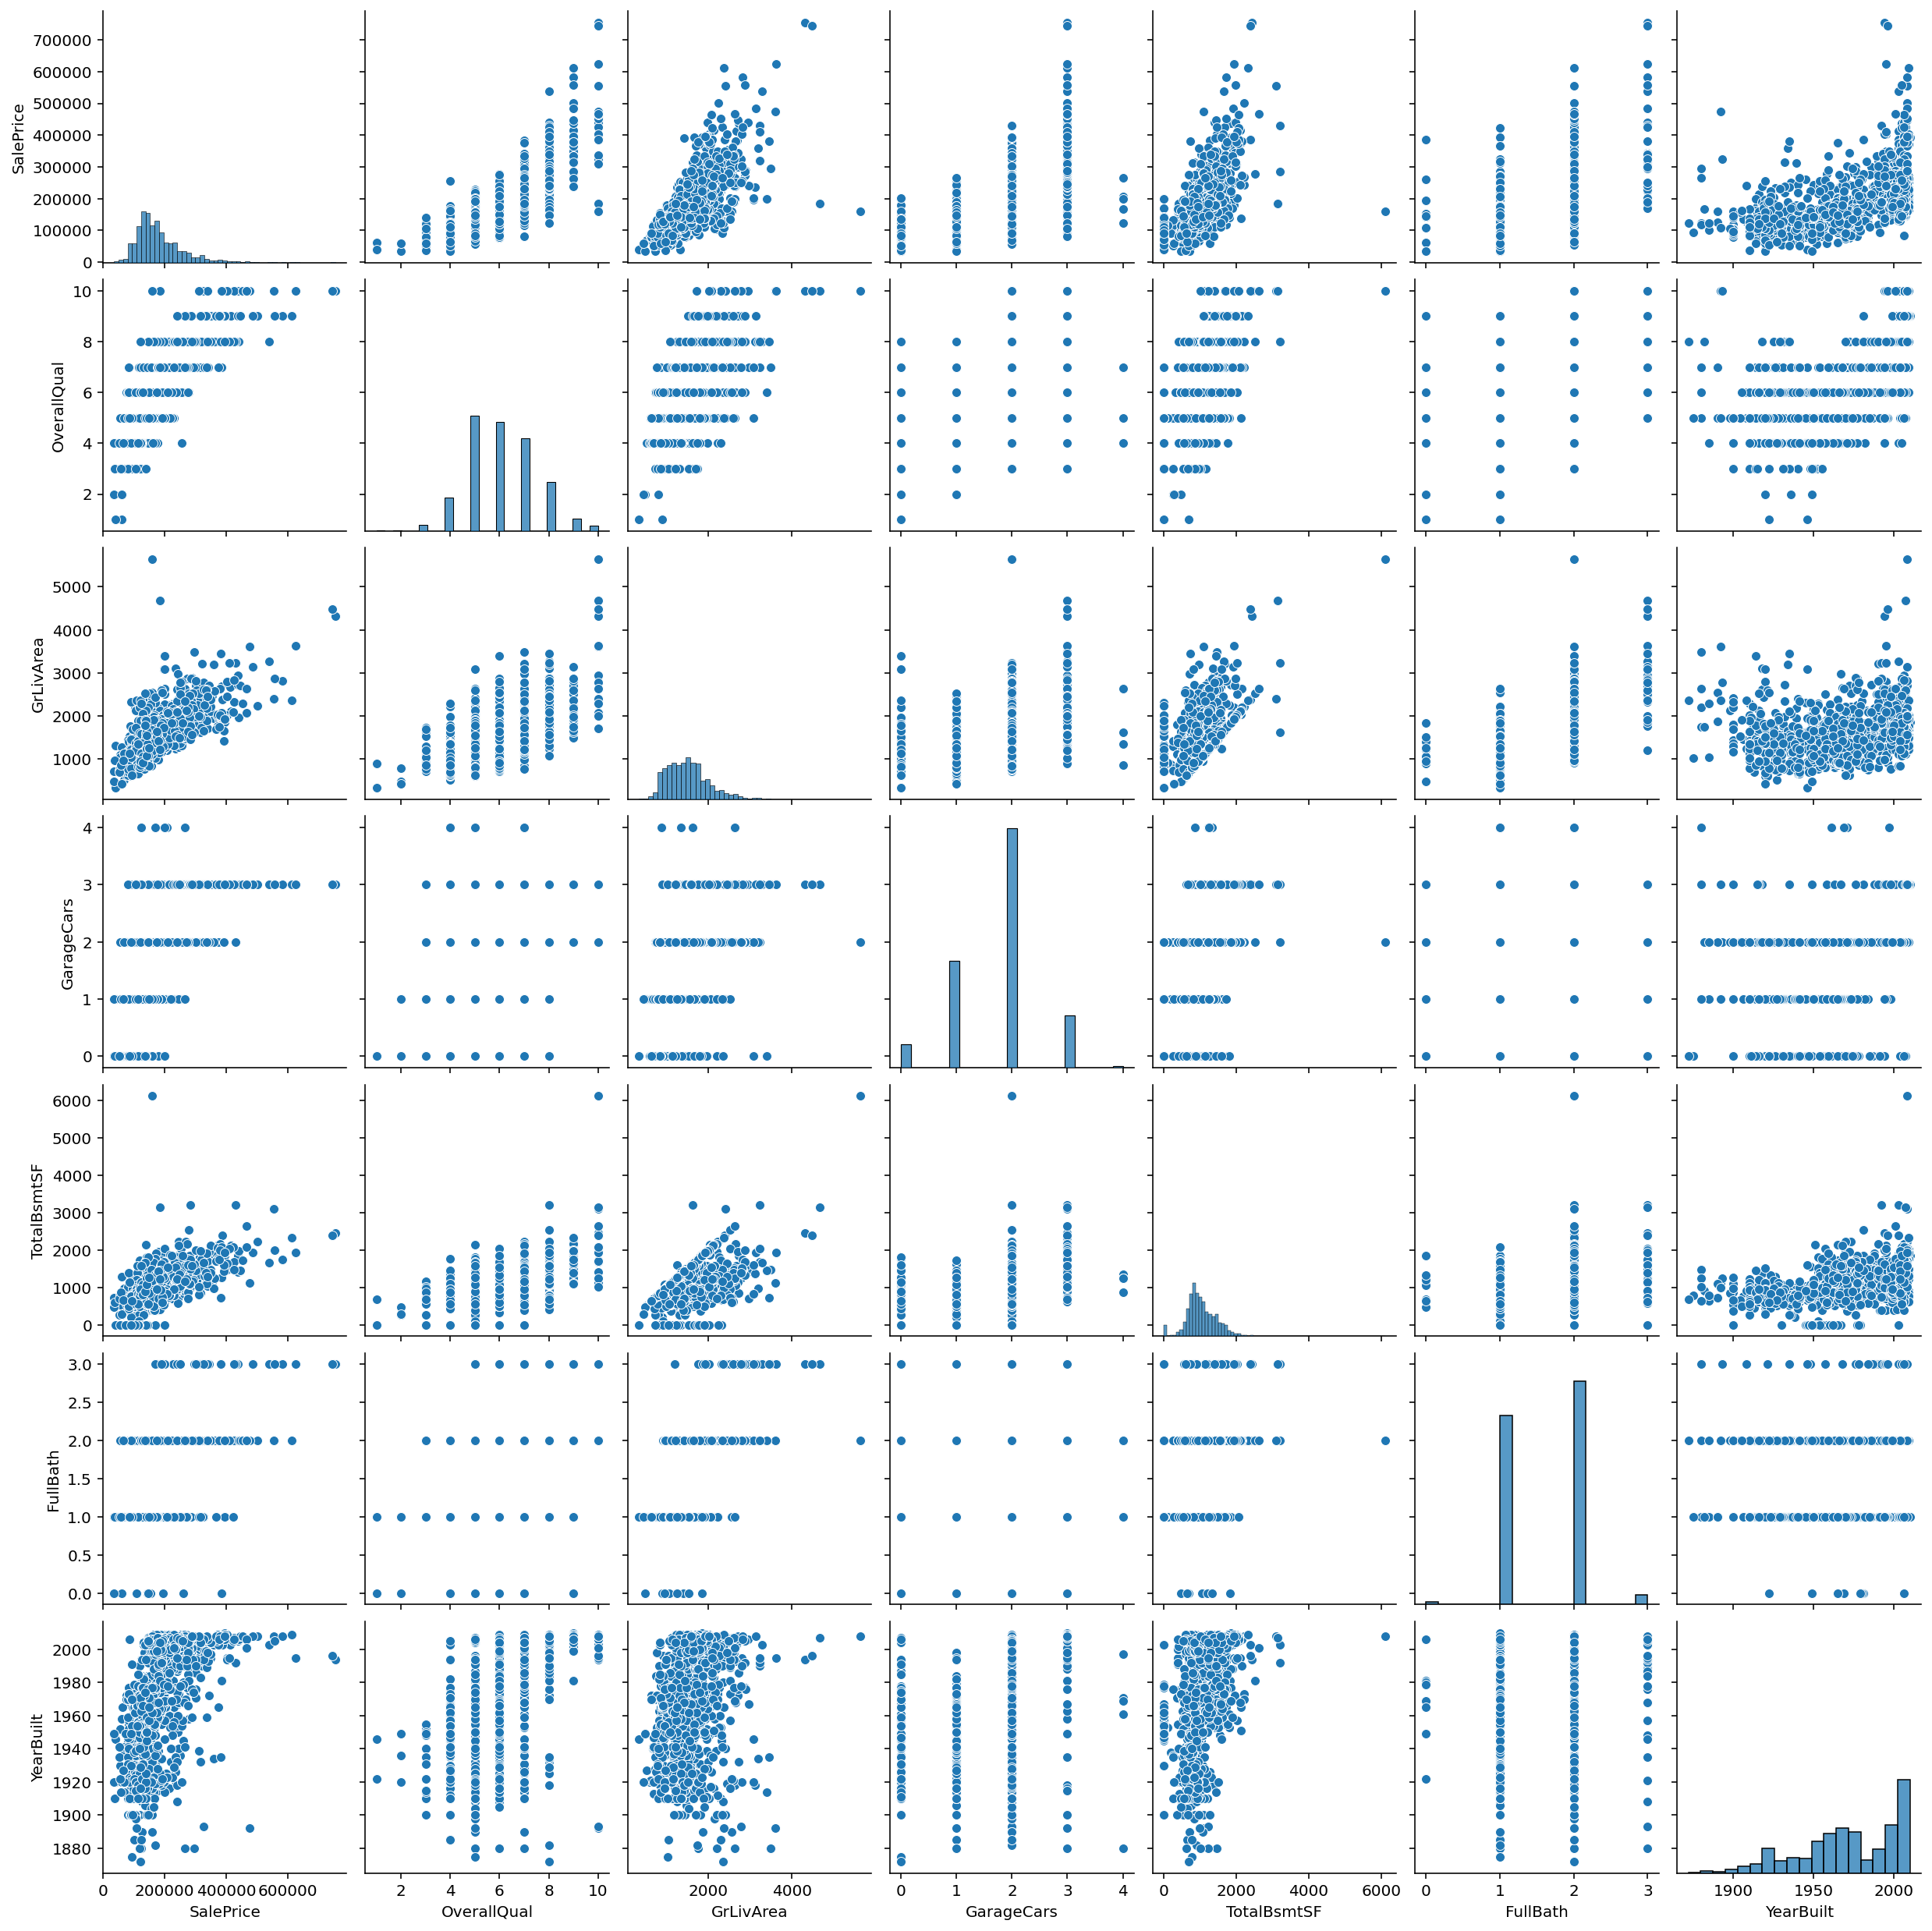

In [49]:
#산포도 매트릭스 (3개를 제외한 7개 특성만 대상으로)
cols=["SalePrice",'OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df[cols])
plt.show()

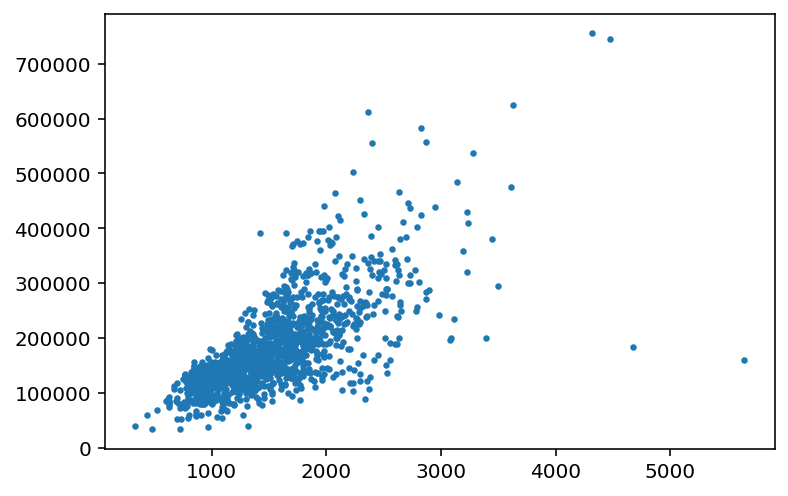

In [50]:
plt.scatter(df['GrLivArea'],df['SalePrice'],s=5)

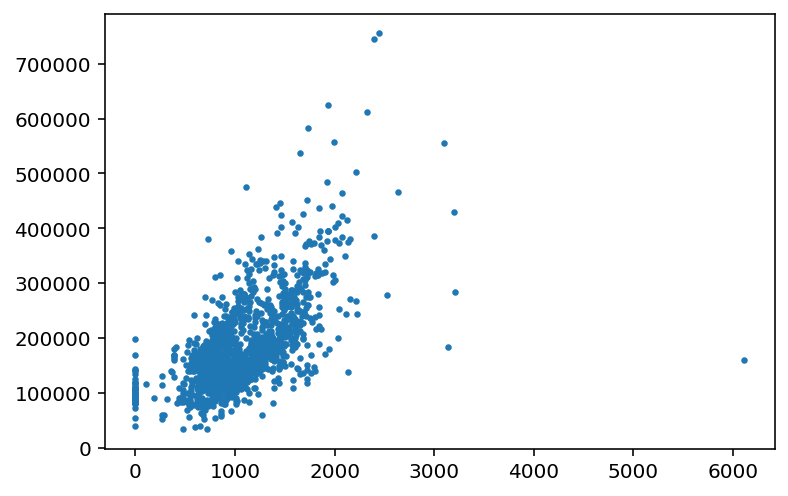

In [51]:
plt.scatter(df['TotalBsmtSF'],df['SalePrice'],s=5)

C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

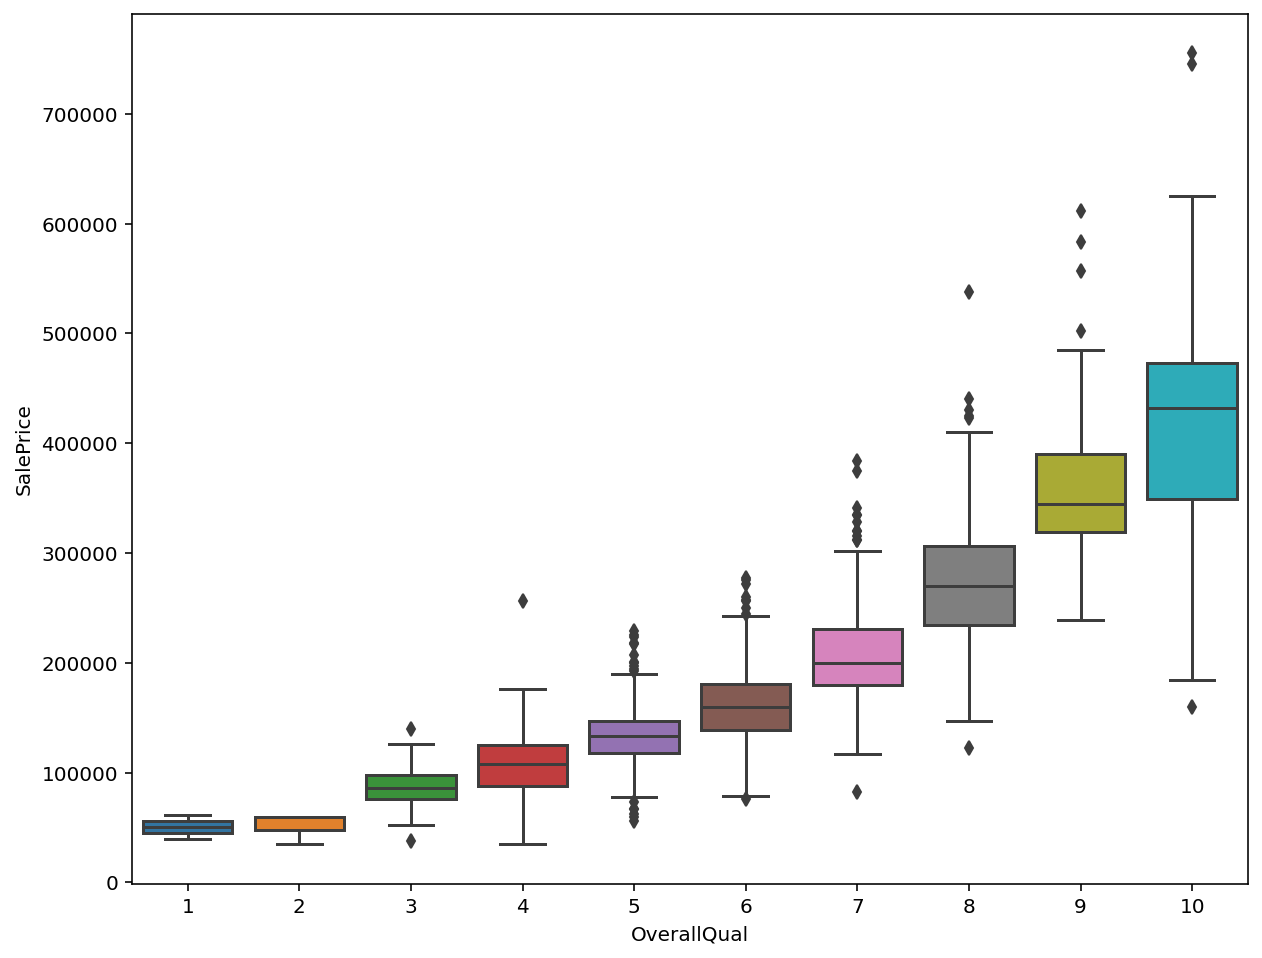

In [52]:
plt.figure(figsize=(10,8))
sns.boxplot(df['OverallQual'],df['SalePrice'])

C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


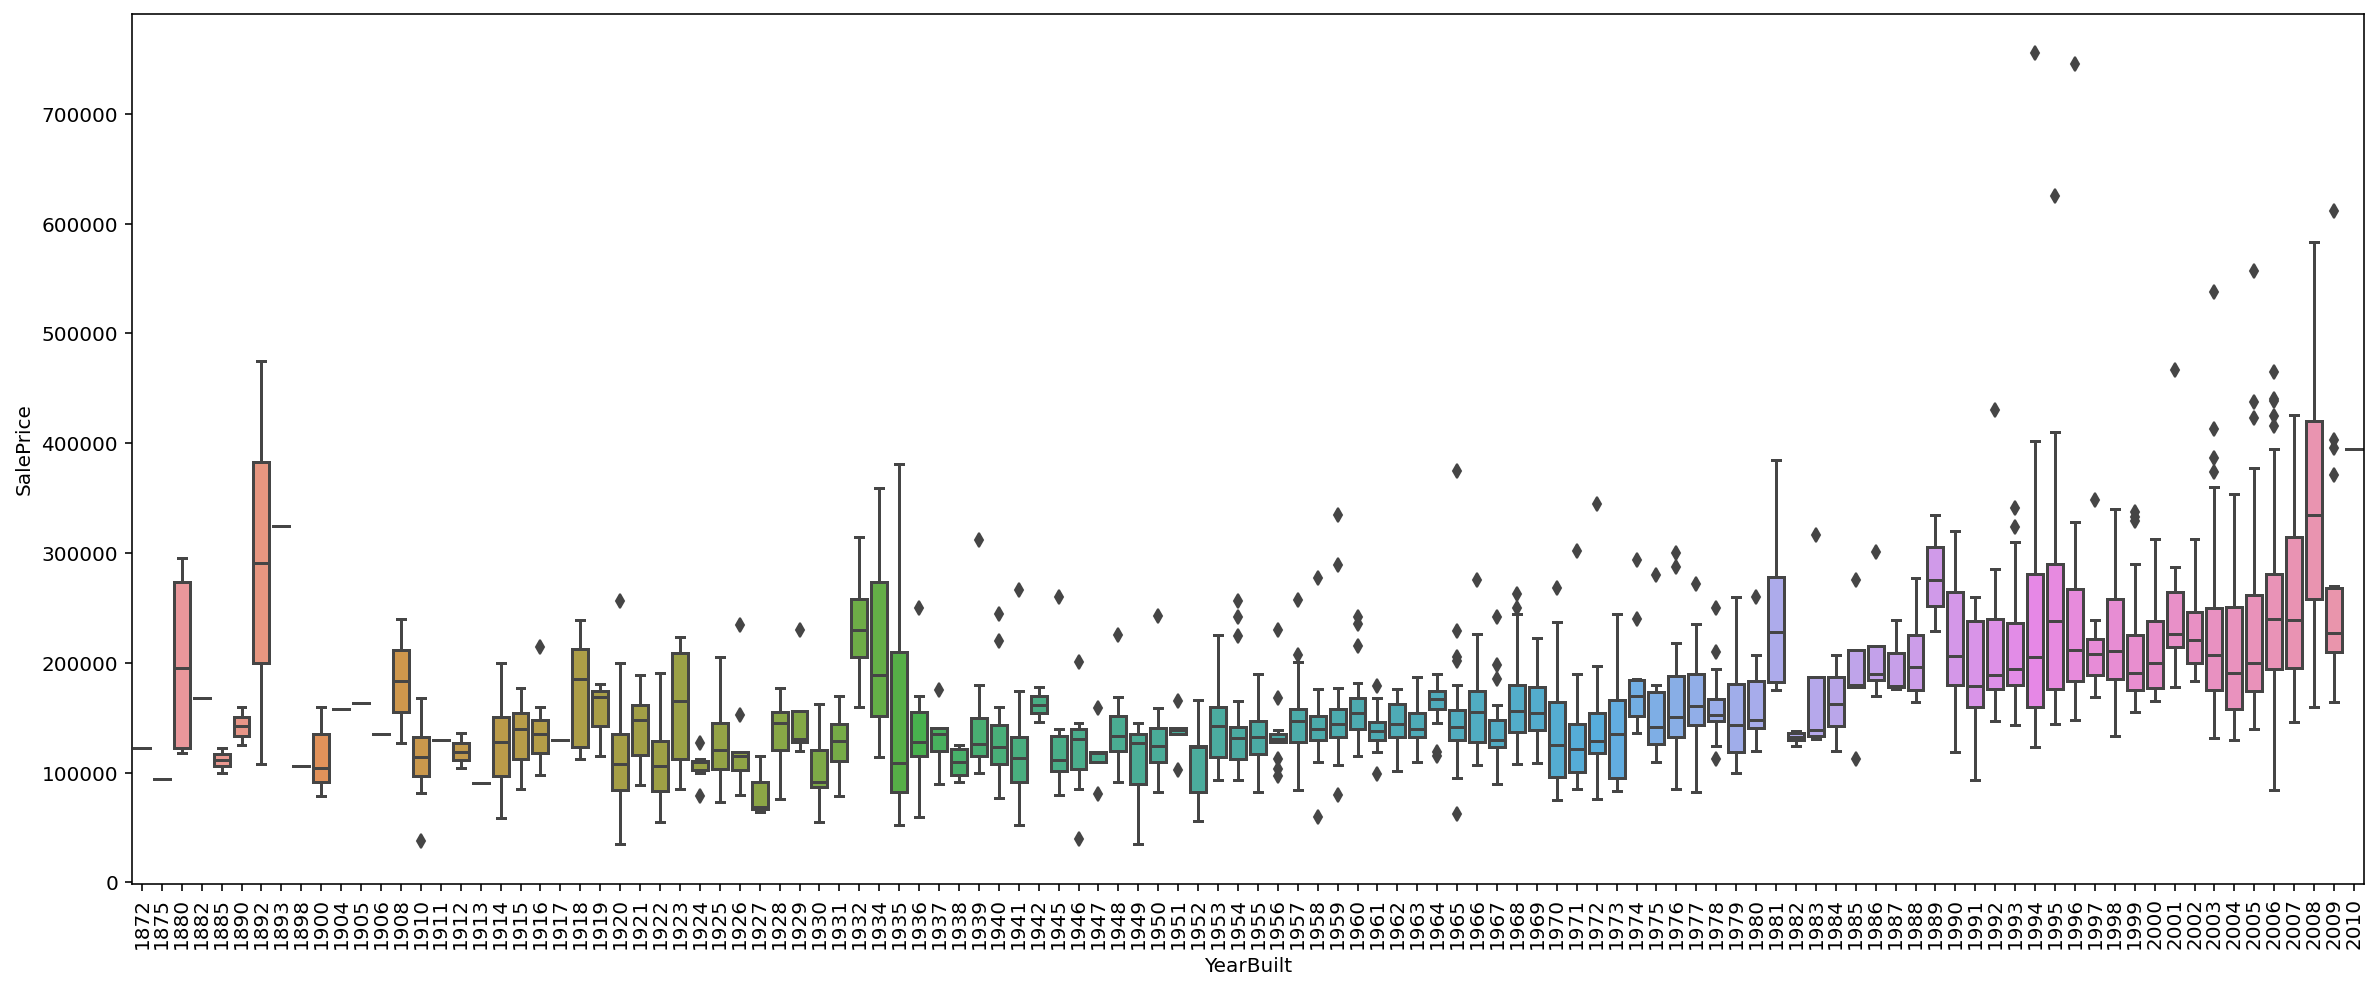

In [53]:
#카테고리 변수인 YearBuilt의 영향 보기
plt.figure(figsize=(20,8))
sns.boxplot(df['YearBuilt'],df['SalePrice'])
plt.xticks(rotation=90);plt.show()

In [54]:
#결측치 처리
#특성별로 결측치 발생 횟수 보기
missing=df.isnull().sum().sort_values(ascending=False).to_frame()
missing.columns=['missing_num']
missing[:10]

,missing_num
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [55]:
#전체 샘플 수
df.shape[0]

1460

In [56]:
#결측치가 발생한 비율 보기
missing['present']=(missing['missing_num']*100/df.shape[0]).round(2)
missing[:20]

,missing_num,present
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


In [57]:
#삭제할 특성 (컬럼) 인덱스
missing[missing['missing_num']>1].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType'],
      dtype='object')

In [58]:
#제거하기 전 데이터프레임 컬럼 수
df.shape

(1460, 81)

In [59]:
#결측치가 2개 이상 있는 컬럼을 삭제 하겠다
df_missing=df.drop(missing[missing['missing_num']>1].index,1)
df_missing.shape

(1460, 63)

In [60]:
#결측치가 하나 있는 경우는 샘플을 삭제
df_missing=df_missing.drop(df.loc[df['Electrical'].isnull()].index)
df_missing.isnull().sum().max()

0

In [61]:
#사본 사용(원본 백업)
df2=df_missing.copy()

C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


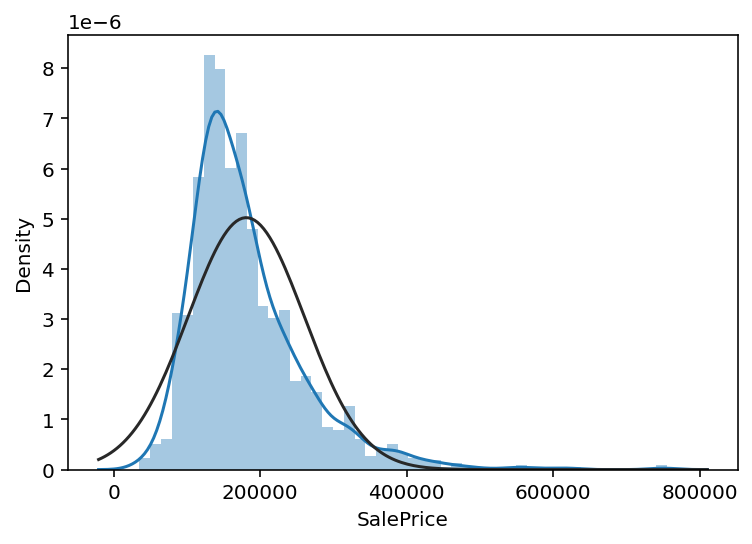

In [62]:
#데이터 변환
#로그 변환 전 데이터
sns.distplot(df2['SalePrice'],fit=norm);

C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


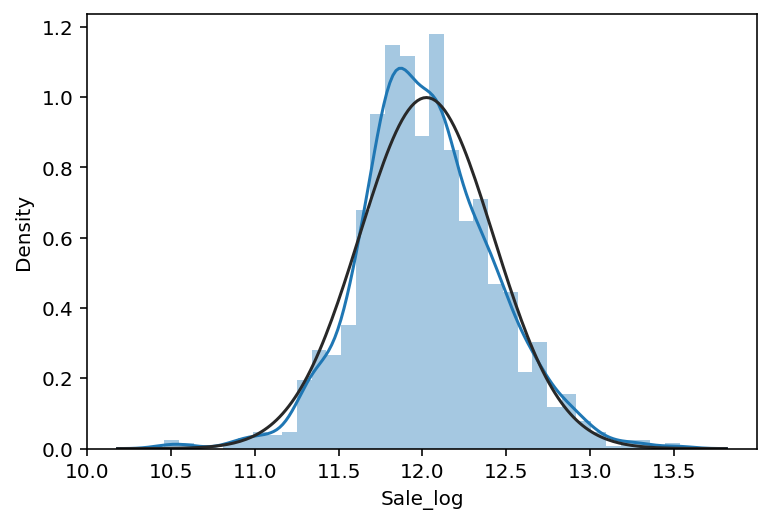

In [63]:
#로그 변환 후 데이터
df2['Sale_log']=np.log(df2['SalePrice'])
sns.distplot(df2['Sale_log'],fit=norm);

C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


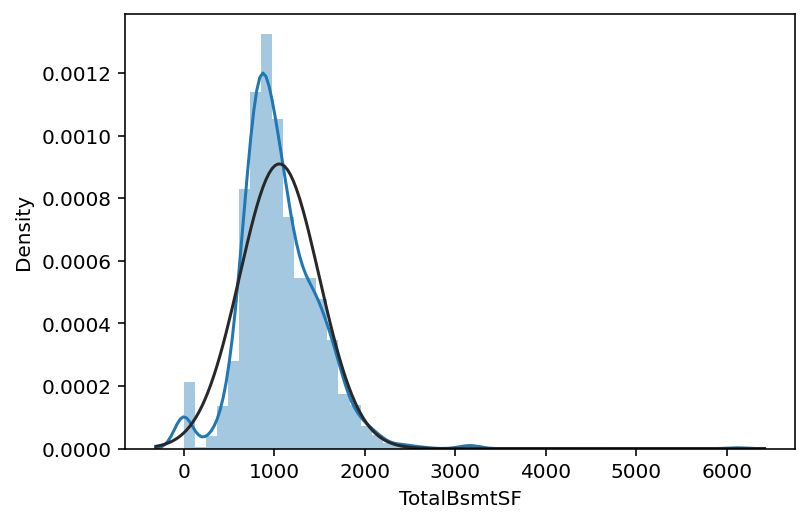

In [64]:
#입력 특성의 로그 변환-TotalBsmtSF
#확률 분포, 가장 가까운 정규분포 함수 비교해 보기
sns.distplot(df2['TotalBsmtSF'],fit=norm);

In [65]:
#지하실 여불르 별도의 컬럼으로 표시, 디폴트는 지하실 없음(0)
df2['HasBsmt']=0
df2.loc[df2['TotalBsmtSF']>0,'HasBsmt']=1
df2[:3]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Sale_log,HasBsmt
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,208500,12.247694,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,181500,12.109011,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,223500,12.317167,1


In [66]:
df2['HasBsmt'].value_counts()

1    1422
0      37
Name: HasBsmt, dtype: int64

In [67]:
#양수인 경우만 로그변환 하고 새로운 컬럼에 추가
df2.loc[df2['HasBsmt']==1,'log_TotalBsmtSF']=np.log(df2['TotalBsmtSF'])
df2[:3]

C:\ProgramData\Anaconda3-1\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Sale_log,HasBsmt,log_TotalBsmtSF
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,12.247694,1,6.752270
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,12.109011,1,7.140453
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,12.317167,1,6.824374


C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


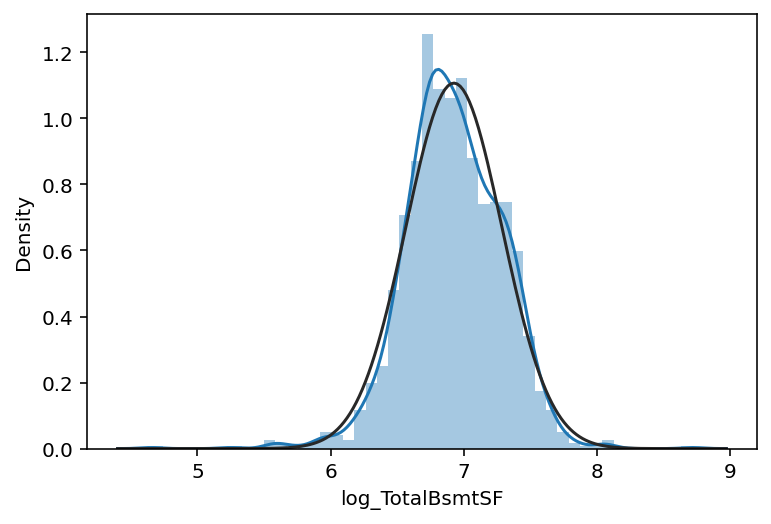

In [68]:
#로그 변환된 특성의 확룰 븐포(가까운 정규 분포와 비교)
sns.distplot(df2['log_TotalBsmtSF'],fit=norm);

C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


755000

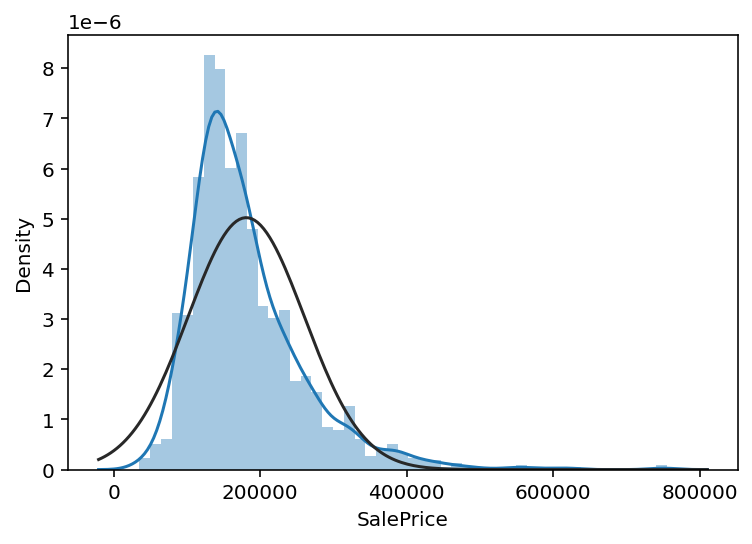

In [69]:
#이상치 찾기
#확률 분포에서 찾기(판매 가격)
sns.distplot(df2['SalePrice'],fit=norm);
df2['SalePrice'].max()

In [73]:
df2.columns
#sale_scaled 컬럼 다시 보자

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'Sale_log', 'HasBsmt', 'log_TotalBsmtSF'],
      dtype='o

In [74]:
#sale price가 머신러닝 모델에서 분석을 할때 머신러닝 특성으로 되는건지
#상위 10개 머신러닝 변환 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
#